# Homework Assignment 3

______

**1. Problem 1: Linear Regression Model (38 points)**

#### Implement a Linear Regression model using both Normal Equation Method and SGD 

In [1]:
#Import necessary packages to the jupyter notebook


import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
# read and load the csv data file

filename = "AMZN.csv"

data_file = read_csv(filename)

# data

data_file

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5753,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
5754,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900
5755,2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100
5756,2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,1949.719971,5123600


In [3]:
# Adjusted Close Price df

data_new = data_file[['Adj Close']]

# converting dataset to numpy array

values_new_df= data_new.values

In [4]:
data_new

,Adj Close
0,1.958333
1,1.729167
2,1.708333
3,1.635417
4,1.427083
...,...
5753,1955.489990
5754,1900.099976
5755,1963.949951
5756,1949.719971


 (a) Use the Python function (given at the end of the document) named **series to supervised()** that takes a univariate or multivariate time series and frames it as a supervised learning dataset (10 points).

In [5]:
from pandas import DataFrame
from pandas import concat

"""
Frame a time series as a supervised learning dataset.
Arguments:
  data: Sequence of observations as a list or NumPy array.
  n_in: Number of lag observations as input (X).
  n_out: Number of observations as output (y).
  dropnan: Boolean whether or not to drop rows with NaN values.
Returns:
  Pandas DataFrame of series framed for supervised learning.
"""

def series_to_supervised(data_file, n_in=1, n_out=1, dropnan=True): 
    
    n_vars = 1 if type(data_file) is list else data_file.shape[1] 
    df = DataFrame(data_file)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1): 
        cols.append(df.shift(i)) 
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1,... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)] 
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True) 
    return agg

In [6]:

#checking the ouput by passing the values_new_df into series to supervised parameter
data = series_to_supervised(values_new_df, 10)

# transformed dataset
data

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,1.958333,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000
11,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417
12,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167
13,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667
14,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667,1.541667
...,...,...,...,...,...,...,...,...,...,...,...
5753,1676.609985,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990
5754,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976
5755,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951
5756,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951,1949.719971


In [7]:
# Trans_data data frame shape
data.shape

(5748, 11)

(b) Use **MinMaxScaler** to scale your data. (2 points)

In [8]:
# Convert the data set into a numpy array 
array = data.values
# Define min max scaler
scaler = MinMaxScaler()
# Transformed the data
file_new = scaler.fit_transform(array)
# data shape
print(file_new.shape)
# Visualize the scaled data
print(file_new)

(5748, 11)
[[2.59357128e-04 1.53693076e-04 1.44087293e-04 ... 5.28325334e-05
  4.08251620e-05 3.84236657e-05]
 [1.53693076e-04 1.44087293e-04 1.10466888e-04 ... 4.08251620e-05
  3.84236657e-05 4.32266033e-05]
 [1.44087293e-04 1.10466888e-04 1.44087293e-05 ... 3.84236657e-05
  4.32266033e-05 2.88177355e-05]
 ...
 [7.78188587e-01 8.32914067e-01 8.43131601e-01 ... 9.00991491e-01
  8.75452055e-01 9.04892242e-01]
 [8.32914067e-01 8.43131601e-01 8.66614396e-01 ... 8.75452055e-01
  9.04892242e-01 8.98331029e-01]
 [8.43131601e-01 8.66614396e-01 8.50550352e-01 ... 9.04892242e-01
  8.98331029e-01 8.78956280e-01]]


(c) Use the Normal Equation Method to find the linear regression coefficients (w). To perform this you may want to take the following steps first: Split your data to X and Y by taking the columns var1(t-10),...,var(t-1) as your 10 features in X, and take the last column var1(t) as your target (Y). Expand your matrix X with a bias vector of ones as the first column (to accomplish this, you may want to use the numpy operations **np.ones , np.reshape and np.append** ).
Use the **train test split** with ‘random state=1’ to split your data to 70% training, and 30% test data. Solve the Normal Equation Method in (2) to find the coefficients w. (10 point).


In [9]:
# Split the data 
X = file_new[:,0:10]
y = file_new[:,10]

# Expand the matirx X with a bias vector of ones

In [10]:

# Create a  vector with 5748 (total of observations) values
vector = np.ones(5748)
# Vector shape
print(vector.shape)
# Print vector to visualize its shape
print(vector)


(5748,)
[1. 1. 1. ... 1. 1. 1.]


In [11]:
# Reshape the vector 

vector=np.reshape(vector, (5748,1))

# New Shape
print(vector.shape)

# Print new vector 
print(vector)

(5748, 1)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [12]:
# Add vector as a first column to the matriz X

X = np.append(vector, X, axis=1)
print(X.shape)

(5748, 11)


In [13]:
# Split the data using train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [14]:
#Normal equation implementation in python using numpy for linear regression

def LinearnormalEquation(X, y):
   
    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

In [15]:
# Normal equation for linear regression
theta = np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train))
print(theta)

[ 1.26111054e-04 -4.83348220e-02  2.24558809e-01 -1.52228741e-01
  3.28901068e-02 -1.08811996e-01  7.17528590e-02 -2.60760209e-02
 -1.48358090e-03  8.01298345e-02  9.28047368e-01]


(d) Make a prediction on your test set using the linear regression function f(x) = wTx, and use both the mean square error and coefficient of determination R2 to measure the performance of your prediction model. For this use fucntions **mean_squared_error** and **r2** score from sklearn library. (6 points)

In [16]:
# Create a function to obtain prediction on y using coefficients(theta)

def predict(X, theta):
    return X.dot(theta)
    

# Calculate the predictions 

preds = predict(X_test, theta)



In [17]:
#predicting using mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,preds )
print('The MSE for the model is:' , mse)

The MSE for the model is: 2.4148595608753934e-05


In [18]:
#predicting using R2
from sklearn.metrics import r2_score
r2=r2_score(y_test, preds)
print("R2 is:", r2)

R2 is: 0.9995593086029828



(e) Next, find the coefficients w using gradient descent algorithm and monitor how your error changes in each epoch; You can create a function **coefficients_sgd** similar to what we did in our Lab Session 7. Note that you may have to make some minor changes to this part of the code (**coefficients_sgd** for linear regression, in lab session 7), due to the additional bias term 1 in your matrix X. For this part, use learning rate 0.01, and number of epochs (iterations) 200. (4 points)

In [19]:
def coefficients_sgd(X_train, Y_train, l_rate, n_epoch): #l-rate is learning rate
  #initializing all coefficients to zero
  coef = [0.0 for i in range(len(X_train[0]))]
  for epoch in range(n_epoch + 1):
    sum_error = 0 # loss
    for i in range(X_train.shape[0]):
      # calculating the prediction using current coeeficients
      yhat = predict(X_train[i,:], coef)
      # calculating error
      error = yhat - Y_train[i] #yhat is prediction, Y_train is ground truth,
      sum_error += error**2 # error square, because loss cannot be negative, or we want to error to be positive.
      #stochastic gradient descent
      coef[0] = coef[0] - l_rate * error
      for j in range(len(coef)-1):
        coef[j + 1] = coef[j + 1] - l_rate * error * X_train[i,j]
    
    print( ' >epoch=%d, lrate=%.3f, error=%.3f ' % (epoch, l_rate, sum_error))
  #returning the list of coefficients  
  return coef

In [20]:
# set the learning rate and the # of epocs
l_rate = 0.01
n_epoch = 200

# Calculate the coefficients using the "coefficients_sgd" function
coef_sgd = coefficients_sgd(X_train, y_train, l_rate, n_epoch)

 >epoch=0, lrate=0.010, error=5.718 
 >epoch=1, lrate=0.010, error=0.423 
 >epoch=2, lrate=0.010, error=0.420 
 >epoch=3, lrate=0.010, error=0.416 
 >epoch=4, lrate=0.010, error=0.413 
 >epoch=5, lrate=0.010, error=0.410 
 >epoch=6, lrate=0.010, error=0.407 
 >epoch=7, lrate=0.010, error=0.404 
 >epoch=8, lrate=0.010, error=0.401 
 >epoch=9, lrate=0.010, error=0.399 
 >epoch=10, lrate=0.010, error=0.396 
 >epoch=11, lrate=0.010, error=0.393 
 >epoch=12, lrate=0.010, error=0.390 
 >epoch=13, lrate=0.010, error=0.387 
 >epoch=14, lrate=0.010, error=0.385 
 >epoch=15, lrate=0.010, error=0.382 
 >epoch=16, lrate=0.010, error=0.380 
 >epoch=17, lrate=0.010, error=0.377 
 >epoch=18, lrate=0.010, error=0.374 
 >epoch=19, lrate=0.010, error=0.372 
 >epoch=20, lrate=0.010, error=0.369 
 >epoch=21, lrate=0.010, error=0.367 
 >epoch=22, lrate=0.010, error=0.365 
 >epoch=23, lrate=0.010, error=0.362 
 >epoch=24, lrate=0.010, error=0.360 
 >epoch=25, lrate=0.010, error=0.358 
 >epoch=26, lrate=0.01

(f) Make a prediction using the coefficients you found from SGD algorithm in previous step **(Y prediction sgd = X test.dot(coef sgd))**; Use both the mean square error and coeffi- cient of determination R2 to measure the performance of your predictions; compare the results with your prediction performance in part d where you used the coefficients found from Normal Equation Method. Which method gives you better results? (6 points)


In [21]:
# Calculate the predictions 

preds_sgd = predict(X_test, coef_sgd)



In [22]:
#predicting using mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,preds_sgd )
print('The MSE for the model is:', mse)

The MSE for the model is: 3.899286562084085e-05


In [23]:
#predicting using R2
from sklearn.metrics import r2_score
r2=r2_score(y_test, preds_sgd)
print("R2 is:", r2)

R2 is: 0.9992884132600274


#### After predicting the MSE and R2 for two models i.e Linear Regression with normal equation and linear regression using gradient descent algorithm better predictions have been Occurred for linear regression using normal equation which is the better model as it got 2.14 as MSE(the lower the mse the better model) and 0.99959(good value) for R2 where as gradient descent equation outputs are 3.899 for MSE and 0.999288 for R2 .I would prefer normal equation model as it metrics are more relatable to select as a better model.

**2. Problem 2: Create a Perceptron model with an optimal value of hyperparameter α (learning rate of SGD) (18 points)**

In [24]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [25]:
# read and load the csv data file
filename = "sonar.all-data.csv" 

data_csv = read_csv(filename)

(a) Split your data into train and test portions with ‘test size = 0.3’ and ’random state = 3’ . Define your learning model to be Perceptron. Use **RepeatedStratifiedKFold** with **‘n splits=10’, ‘n repeats=5’, and ‘random state=1’ as your model evaluation method. (6 points)

In [26]:
#converting the dataset to a numpy array

array = data_csv.values

# separate array into input and output components

X = array[:,:-1] 
Y = array[:,-1]

# Split the data into train and test portions

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)



In [27]:

#define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
results = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Mean Accuracy: %.3f - Std: %.3f' % (results.mean(), results.std()))
print('Accuracy: %.3f' % accuracy_score(pred, y_test))
print('F1-Score: %.3f' % f1_score(pred, y_test))

Mean Accuracy: 0.664 - Std: 0.119
Accuracy: 0.651
F1-Score: 0.500


(b) Use **GridSearchCV** to perform a gird search on the parameter of Perceptron algorithm (learn- ing rate α in SGD), consider values for α as [0.0001, 0.001, 0.01, 0.1]. For your GridSearch, use data only from your training sets (X train, Y train). (6 points)

In [28]:
from sklearn.model_selection import GridSearchCV
# Define Grid 

grid = dict()
grid['alpha'] = [0.0001, 0.001, 0.01, 0.1] # Regularization term 

In [29]:
# Define search

search= GridSearchCV(model, grid, cv=cv, n_jobs=-1)

# Perform the search 

results_grid = search.fit(X_train, y_train)

(c) Report the best score and the best value of the parameter in your search. (2 points)


In [30]:
# summarize
print('Mean Accuracy: %.3f' % results_grid.best_score_)
print('The best value of the parameter alpha is : %s' % results_grid.best_params_)

Mean Accuracy: 0.664
The best value of the parameter alpha is : {'alpha': 0.0001}


(d) Create a Perceptron model which takes as an argument the best value of parameter you found in the previous step, and use this model to make predictions on your test set; Report the accuracy. (4 points)

In [31]:
#define model
model_new=Perceptron(alpha=0.0001)
# define model evaluation method
cv_new = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv_new, n_jobs=-1)
# summarize result
print('Mean Accuracy and std : %.3f (%.3f)' % (mean(scores), std(scores)))
model_new.fit(X_train, y_train)
pred = model_new.predict(X_test)
print('Accuracy score of predicted: %.3f' % accuracy_score(pred, y_test))
print('F1-Score: %.3f' % f1_score(pred, y_test))


Mean Accuracy and std : 0.664 (0.119)
Accuracy score of predicted: 0.651
F1-Score: 0.500


**3. Problem 3: Create a KNN model with an optimal value of hyperparameter K (the number of nearest neighbors) (18 points)**

In [32]:
#import necessary packages to the Jupyter notebook # Create a KNN model with the best parameter K import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

(a) Split the data into train and test sets with **‘test size = 0.3’, and ‘random state = 5’**. Create a KNN model with parameter ‘n neighbor’ varying from 1 to 30 (see the code from Lab Session 6). (8 points)

In [33]:
# read and load the csv data file
filename = "sonar.all-data.csv" 
dataframe = read_csv(filename)

#converting the dataset to a numpy array
array = dataframe.values
# separate array into input and output components
X = array[:,:-1] 
Y = array[:,-1]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)




In [34]:
#define a model, evaluate abd predict the score 
scores = {}
for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_pred, y_test)

In [35]:
scores[k]

0.6984126984126984

In [36]:
scores


{1: 0.7777777777777778,
 2: 0.7142857142857143,
 3: 0.7301587301587301,
 4: 0.7142857142857143,
 5: 0.746031746031746,
 6: 0.746031746031746,
 7: 0.6507936507936508,
 8: 0.6349206349206349,
 9: 0.6666666666666666,
 10: 0.6666666666666666,
 11: 0.6825396825396826,
 12: 0.6507936507936508,
 13: 0.6666666666666666,
 14: 0.6507936507936508,
 15: 0.6825396825396826,
 16: 0.6666666666666666,
 17: 0.6507936507936508,
 18: 0.6666666666666666,
 19: 0.6507936507936508,
 20: 0.7142857142857143,
 21: 0.6825396825396826,
 22: 0.6825396825396826,
 23: 0.6984126984126984,
 24: 0.6825396825396826,
 25: 0.6825396825396826,
 26: 0.6825396825396826,
 27: 0.6666666666666666,
 28: 0.6984126984126984,
 29: 0.7142857142857143,
 30: 0.6984126984126984}

(b) Plot the accuracy of the KNN model in terms of the number of nearest neighbor k varying from 1 to 30. Choose and report the best value for k. (5 points)

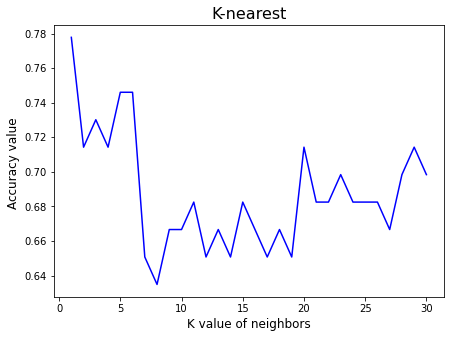

In [37]:
plt.figure(figsize=(7,5))
plt.plot(list(scores.keys()),list(scores.values()), c='b')
plt.title('K-nearest', fontsize=16)
plt.xlabel('K value of neighbors', fontsize=12)
plt.ylabel('Accuracy value ', fontsize=12)
plt.show()

(c) Create a new KNN model with the best values of nearest neighbors that you found in previous step, and perform prediction on your test set. Report the accuracy of the model. (5 points).

The best kneighbor is 1 from the above problem so selecting that to do the predictions in problem.c

In [38]:
# Define the model
knn= KNeighborsClassifier(n_neighbors=1)

# Fit the mode

# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

# Evaluate model
results_knn = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (results_knn.mean(), results_knn.std()))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = accuracy_score(y_pred, y_test)

Mean Accuracy: 0.708 (0.149)


In [39]:
print(y_pred)

[0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]


In [40]:
#Accuracy score
scores

0.7777777777777778